## Relationship between Consumer behavior and service renderer

In this notebook i plan on showing the relationship between how consumers react to services rendered by various financial institutions. By digging deep into how consumers react to certain issues they face various organizations i plan on developing a strategy aimed at increasing consumers experience and also highlight various reason why certain organization have recorded decline in the number of consumers and certain aspects of their services the should try to improve as well aa graphing out the increase in the numbers of conusmers. In this notebook i are making use of the standard consumer complaint dataset gotten from kaggle, with training sample of 903983 

In [1]:
import os
os.chdir('C:\\Users\\HP\\financedatasets')

In [2]:
#Firstle we import the data
import pandas as pd
data = pd.read_csv('Consumer_Complaints.csv')

#Visualization
In order to acheive this goal we have to first manually observe correlations between various features of the dataset, by doing this we can physically observe the values various inouts take and try to make correlations between them

In [3]:
#convert the data into a dataframe
df = pd.DataFrame(data)

#load the first 5 inputs of the data
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,759217
1,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,6/8/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/2014,Closed with explanation,Yes,Yes,885638
4,9/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/2014,Closed with explanation,Yes,Yes,1027760


In [4]:
#select the 8th input of the data for visualization
df.loc[7]

Date received                                                           6/15/2015
Product                                                          Credit reporting
Sub-product                                                                   NaN
Issue                                    Credit reporting company's investigation
Sub-issue                                          Inadequate help over the phone
Consumer complaint narrative    An account on my credit report has a mistaken ...
Company public response          Company chooses not to provide a public response
Company                                       Experian Information Solutions Inc.
State                                                                          VA
ZIP code                                                                    224XX
Tags                                                                          NaN
Consumer consent provided?                                       Consent provided
Submitted via   

# comparison and visualization
From this little visualization made we should have noticed that there is a corelation between the various issues that consumers have and whether they stop using a particular service, to further assert this claim below are various plots 

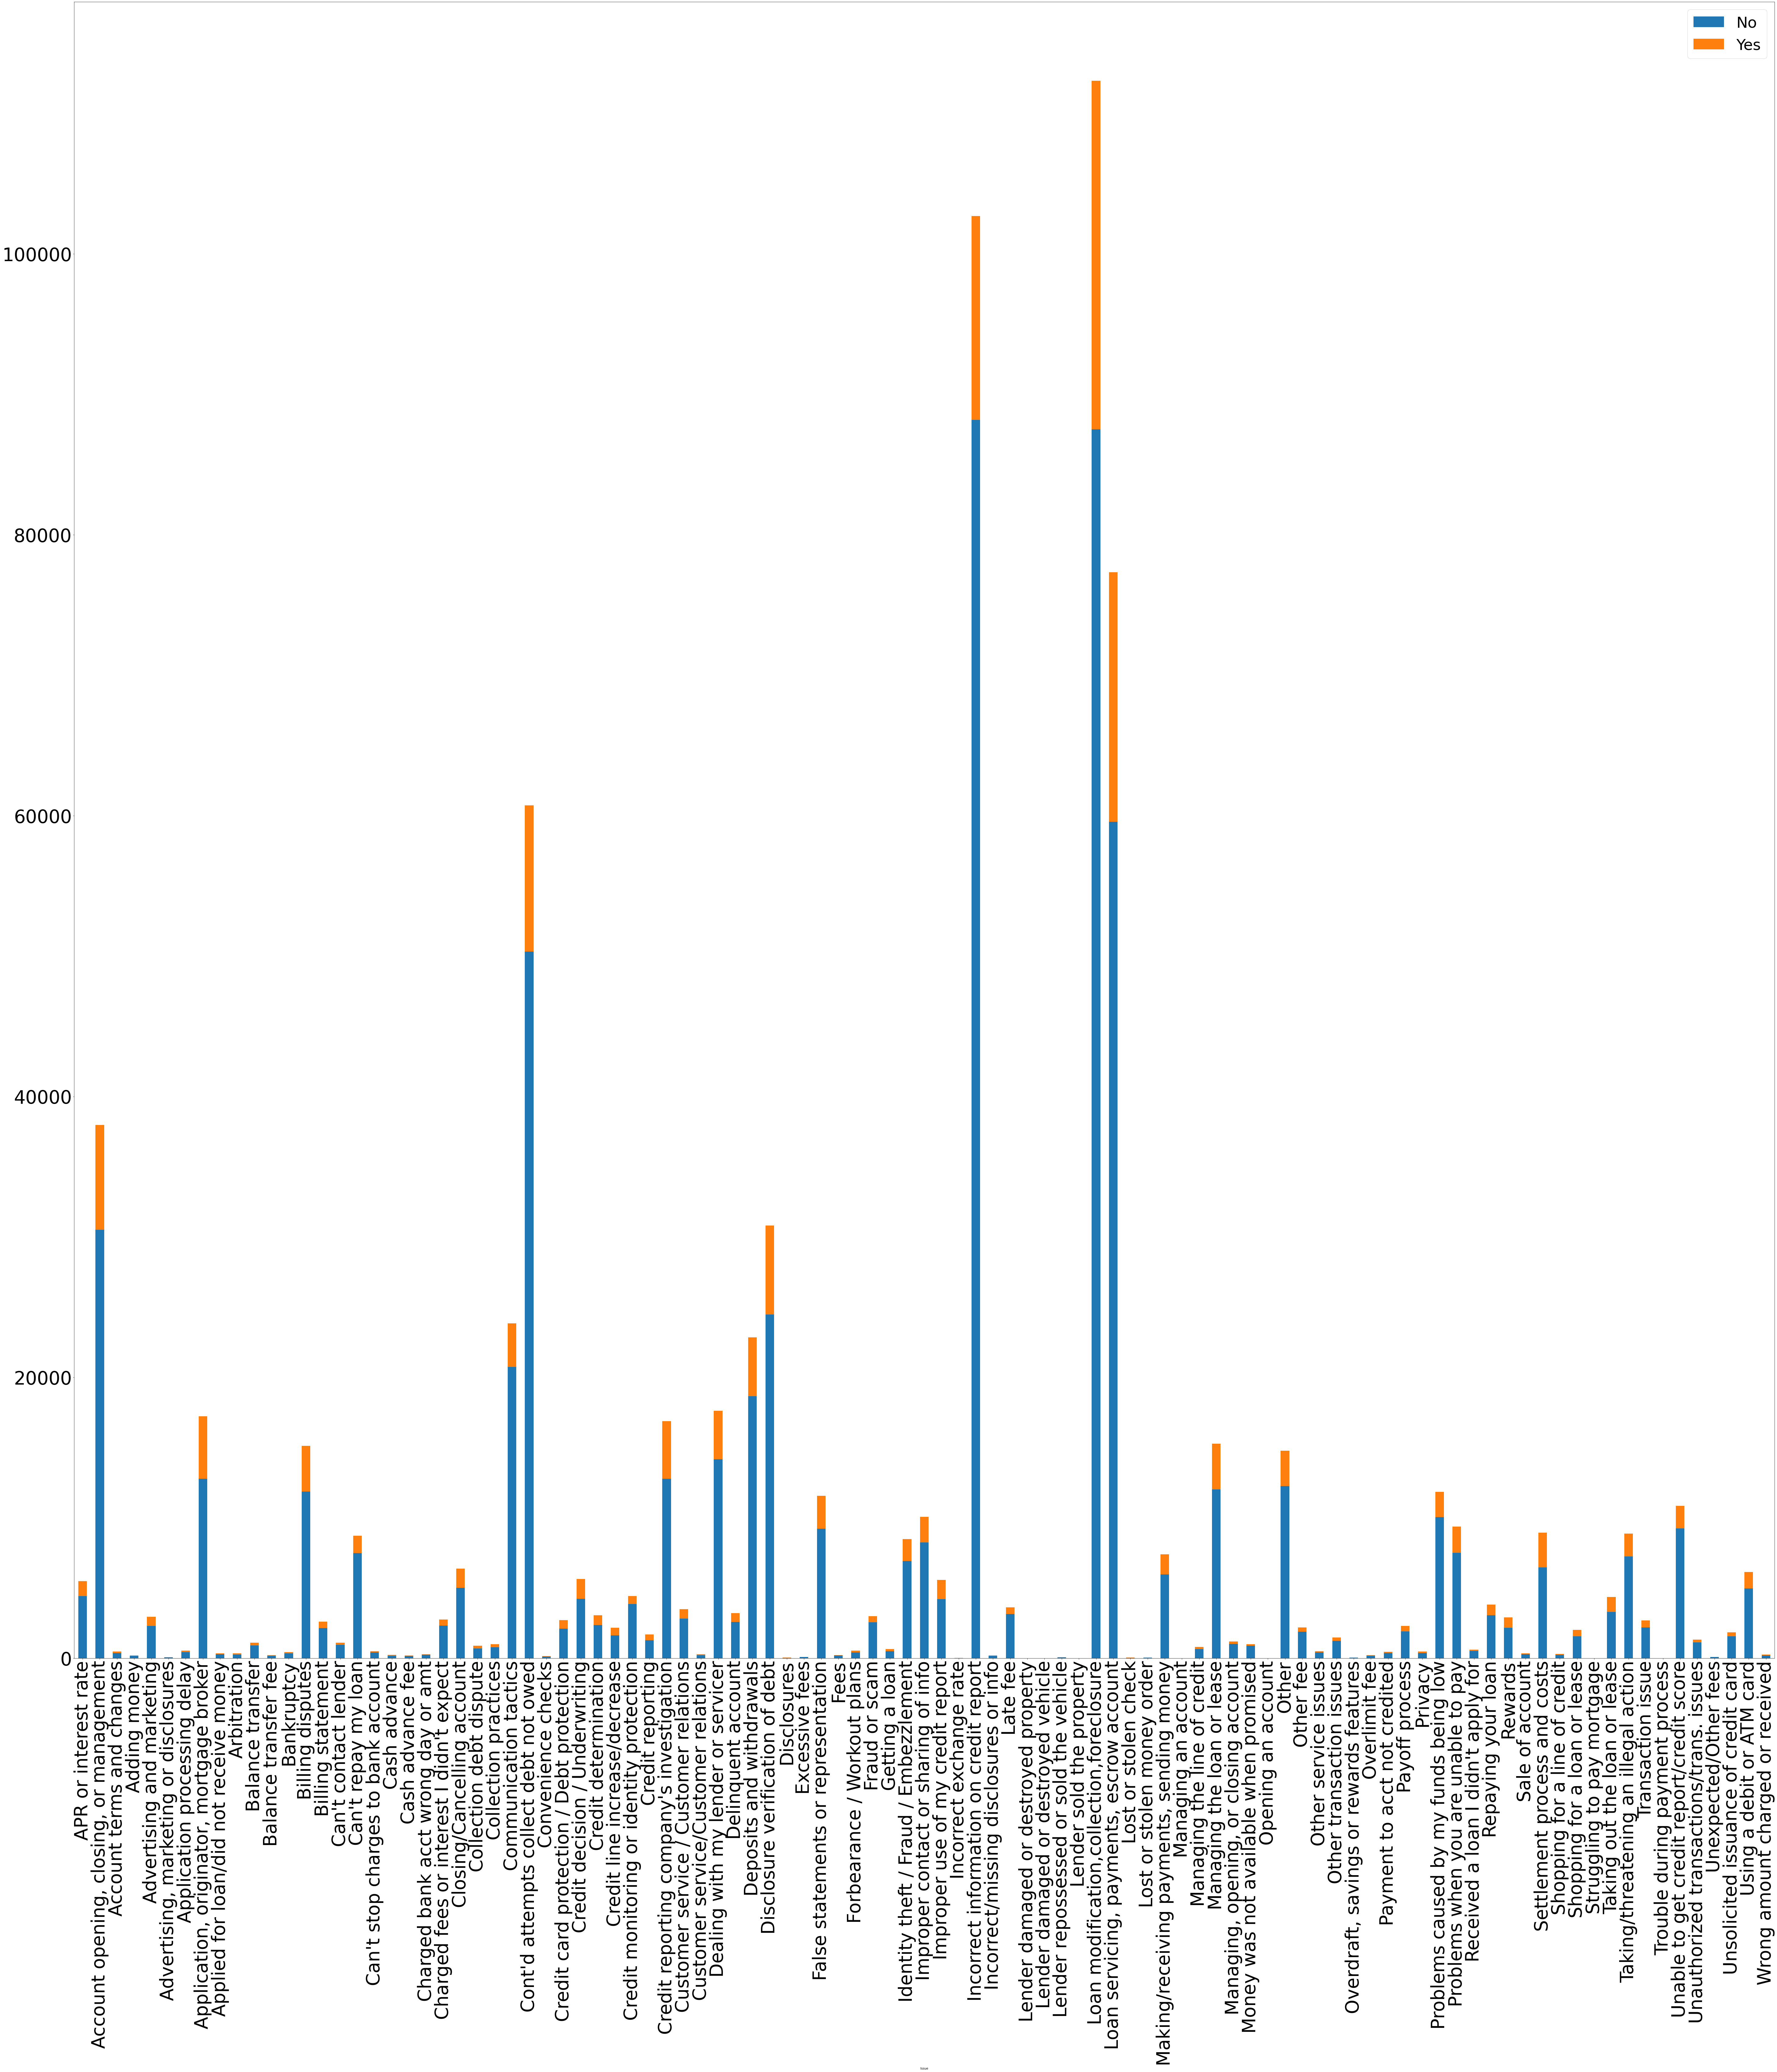



from this plot we can see that the problem associated with a particular service has a great impact on whether the consumer, especially if it's associated to loan modification, collection and foreclosure would stop using the service or continue with it.

we again plot they response of the service renderers and how it affect the consumers

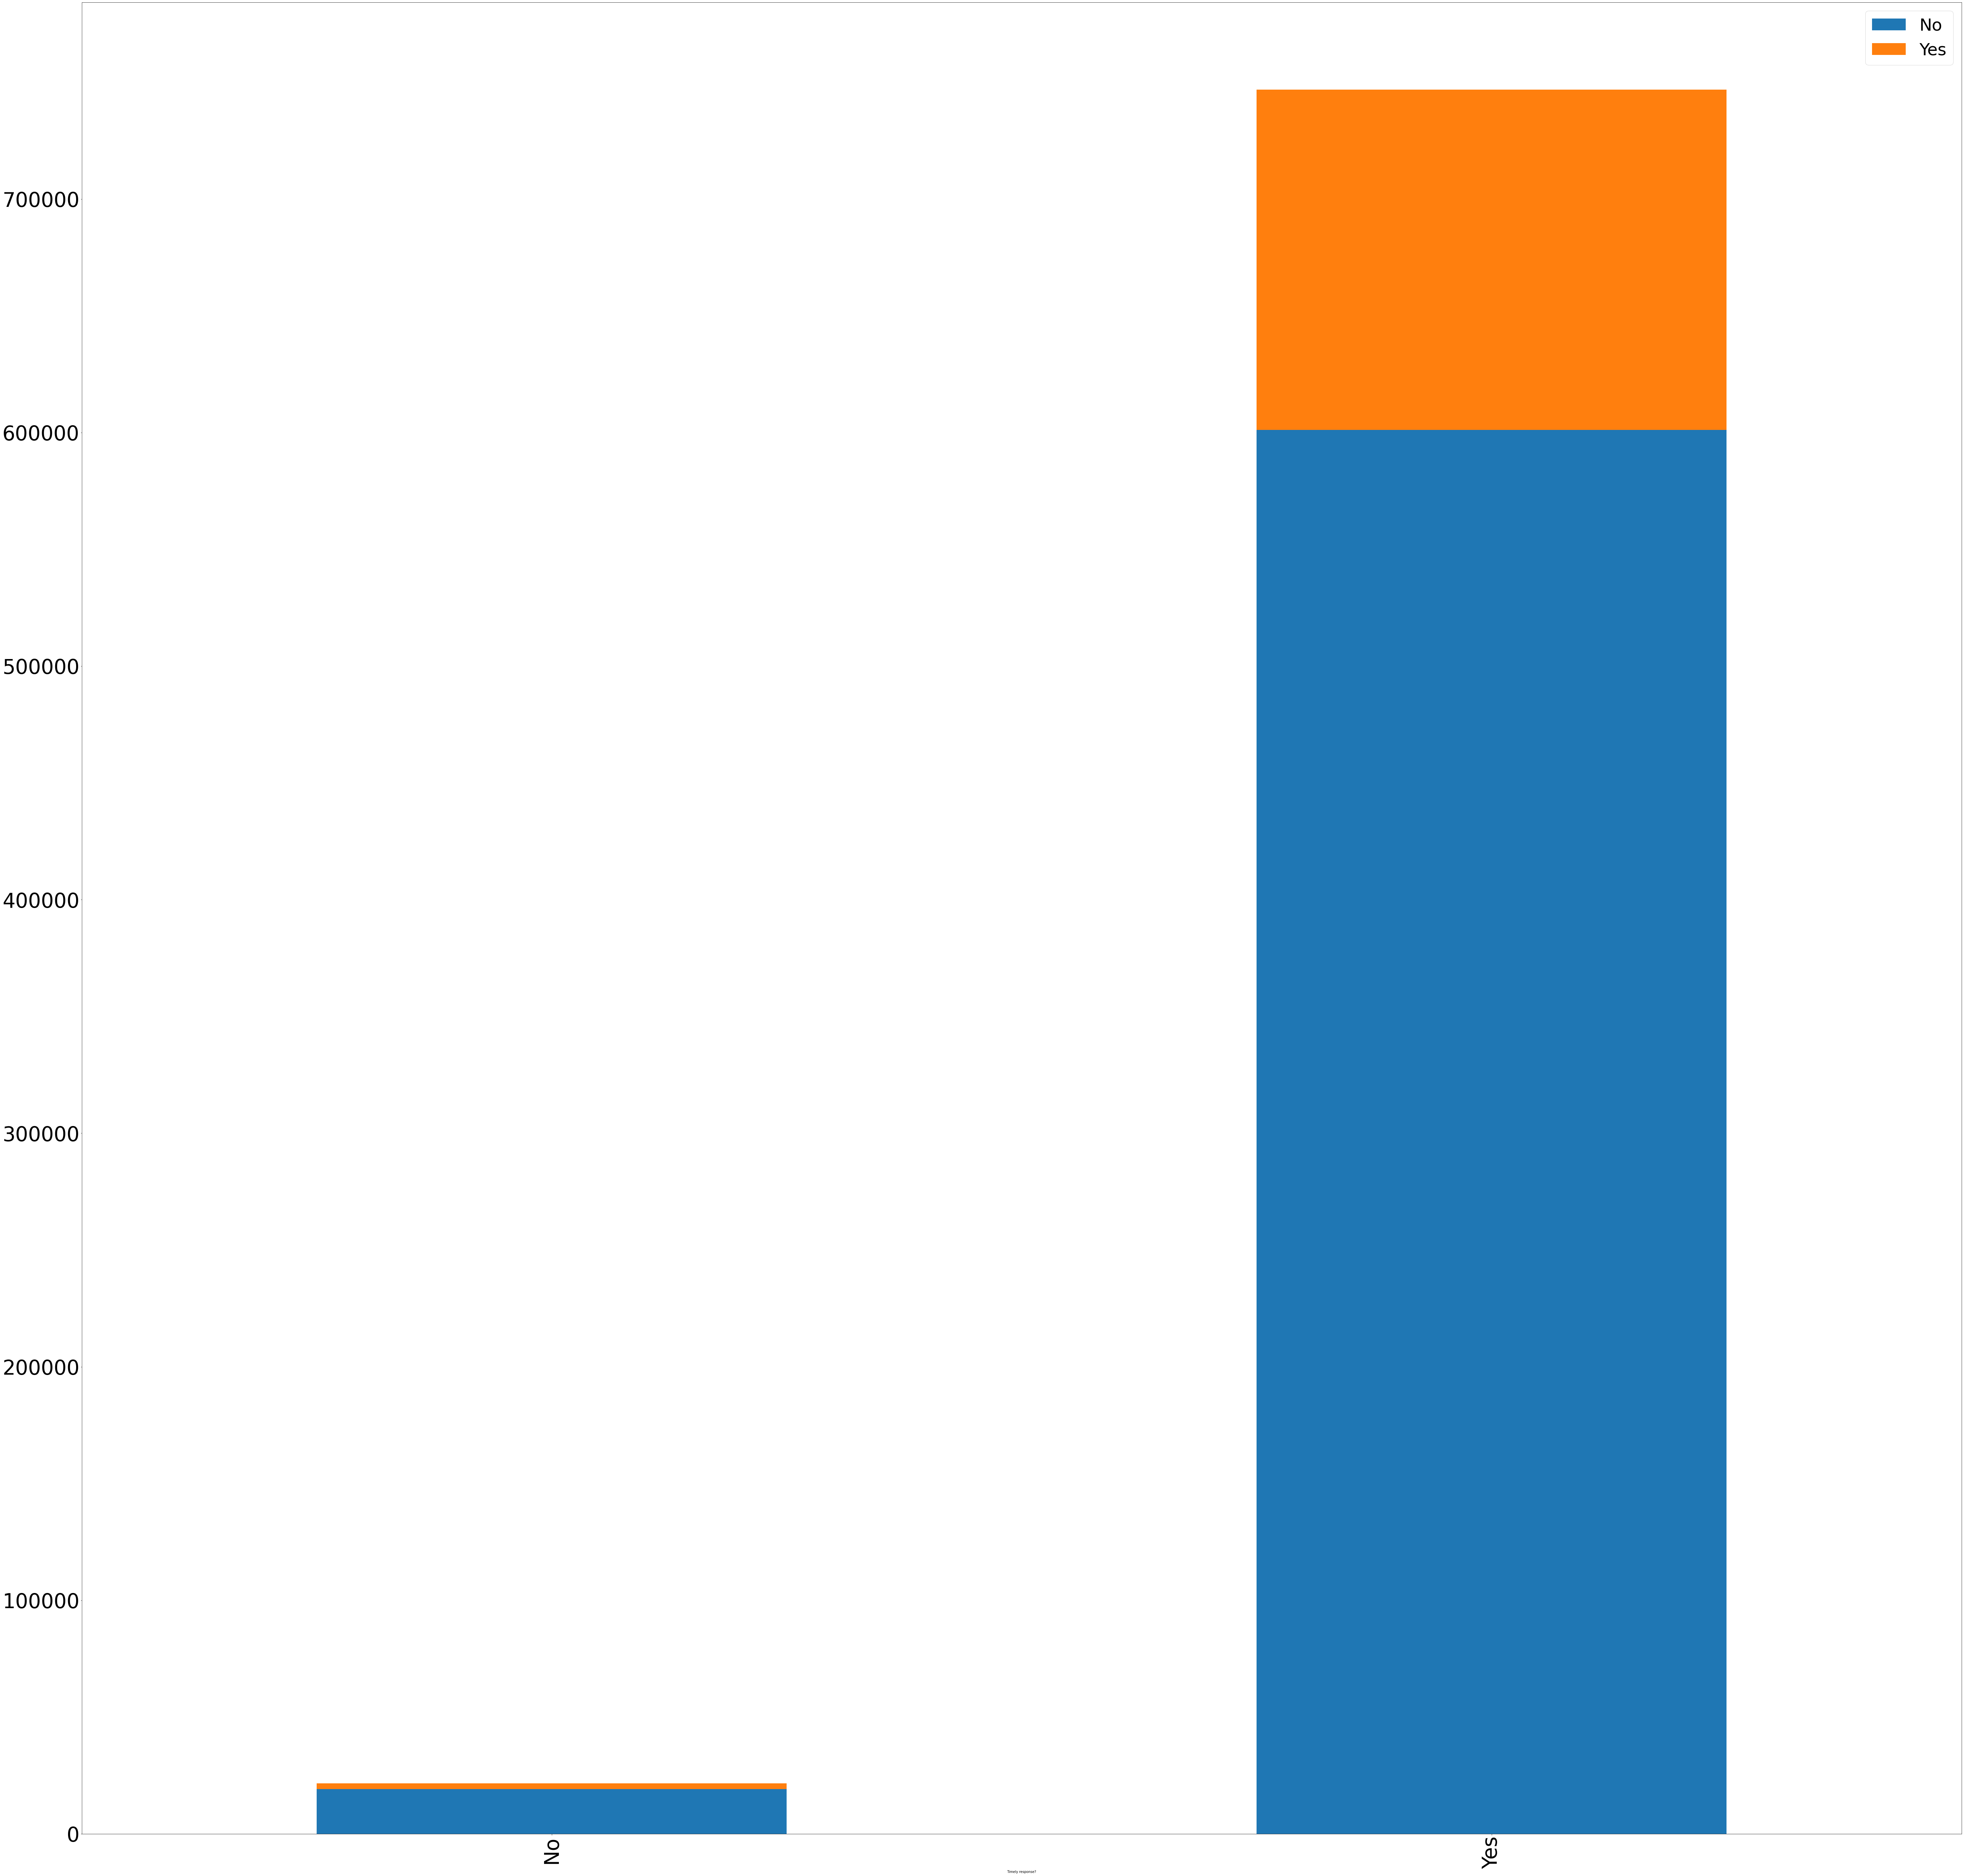

by using the formula Y = total_number_of_yes/total_number_nos * 100,
to calculate the percentage of times a timely response helped save a service provider from lossing the customer we see that
66.6% of the times a timely response saved the service provider from loosing the consumer, this makes perfect sense as a timely response is a reliable indicator that the service provider is working on the various problems highlighted by the consumer

we can see that the effect of a timely response can't be overlooked!!!



In [5]:
#select the first 10 input based on their Issue, Sub-Issue Timely response and whether the consumer was disputed or not
df.loc[0:10, ['Issue', 'Sub-issue', 'Timely response?', 'Consumer disputed?']]

,Issue,Sub-issue,Timely response?,Consumer disputed?
0,"Loan modification,collection,foreclosure",NaN,Yes,No
1,Incorrect information on credit report,Account status,Yes,No
2,Managing the loan or lease,NaN,Yes,No
3,Bankruptcy,NaN,Yes,Yes
4,Communication tactics,Frequent or repeated calls,Yes,Yes
5,"Loan servicing, payments, escrow account",NaN,Yes,No
6,Improper contact or sharing of info,Contacted employer after asked not to,Yes,No
7,Credit reporting company's investigation,Inadequate help over the phone,Yes,No
8,"Loan modification,collection,foreclosure",NaN,Yes,Yes
9,"Loan modification,collection,foreclosure",NaN,Yes,No


In [8]:
df2 = df[['Product', 'Issue', 'Company response to consumer', 'Timely response?', 'Consumer disputed?']]

In [9]:
df2.head()

,Product,Issue,Company response to consumer,Timely response?,Consumer disputed?
0,Mortgage,"Loan modification,collection,foreclosure",Closed with explanation,Yes,No
1,Credit reporting,Incorrect information on credit report,Closed with explanation,Yes,No
2,Consumer Loan,Managing the loan or lease,Closed with explanation,Yes,No
3,Credit card,Bankruptcy,Closed with explanation,Yes,Yes
4,Debt collection,Communication tactics,Closed with explanation,Yes,Yes


# Filling In Missing Customer disrupted value
#### Deciding what features are important and which one should be dropped
    In order to proceed further we must decide which features are important and really affects consumers behavior


##### 1 .)  Issue:
      This corresponds to the partcular issue a consumer has with the service being offered. As seen in previous graphs certain issues tends to be more serious than others and this has a huge role to play in telling if the consumer would stop using the services rendered by the service provider. Identifying the issue of the consumer would go a long way in helping the service provider, here is a description of the data
| description| value                                       |
|------------|---------------------------------------------|      
| count      |                                      903983 |
| unique     |                                       166   |
| top        |  Loan modification,collection,foreclosure   |
| freq       |                                     112315  |
| Name:      |Issue, dtype: object                         |
|----------------------------------------------------------|
  
##### 2.) Sub-Issue:
      This is a summary of the issues faced by the consumer. This is quite similar to the issue faced by the consumer. If we are to include both features as factors affecting the consumer behavior then we might risk leaking too much information about the **particular data we are dealing with. Dropping this saves us a lot of time as well as the memory allocated to this notebook so we are dropping it
      
| description| value                                       |
|------------|---------------------------------------------|      
| count      |                                      426386 |
| unique     |                                       217   |
| top        |                              Acccount status|
| freq       |                                     112315  |
| Name:      |Sub-issue, dtype: object                         |
|----------------------------------------------------------|


##### 3.) Timely Response:
      This has to do with how fast the service provider responded to the complaints of the consumer, this tells us quite a bit about whether or not the consumer would continue using the services or not. Here is the datails

| description| value                                       |
|------------|---------------------------------------------|      
| count      |                                      903983 |
| unique     |                                       2     |
| top        |                                          Yes|
| freq       |                                     879376  |
| Name:      |Issue, dtype: object                         |
|----------------------------------------------------------|

##### 4.) Company response to consumer:
      Not on a timely response is important , but also the response itself. If a service provider response is not good or encouraging enough then he or she risks loosing such consumer!!! Hence the response of the service provider is quite important hence would be considered as one of the factors. It's details are below
      
| description| value                                       |
|------------|---------------------------------------------|      
| count      |                                      903983 |
| unique     |                                            8|
| top        |                      Closed with explanation|
| freq       |                                     686039  |
| Name:      |Company response to consumer, dtype: object                         |
|---------------------------------------------------------|

##### 5.) Products:
      As a data scientist if ther is one thing i have learnt, it's that to everything there is always an underlying pattern. To every product there is always an underlying issue associated with it. Obviously a consumer can't have an issue with loan  management when the services assoiciated with it has nothing to do with loans!!. Exploiting this sort of structure in data through mere observation could sky rocket our performance!!!
      lets take a look a these two plot
      Products vs If consumer was disputed
  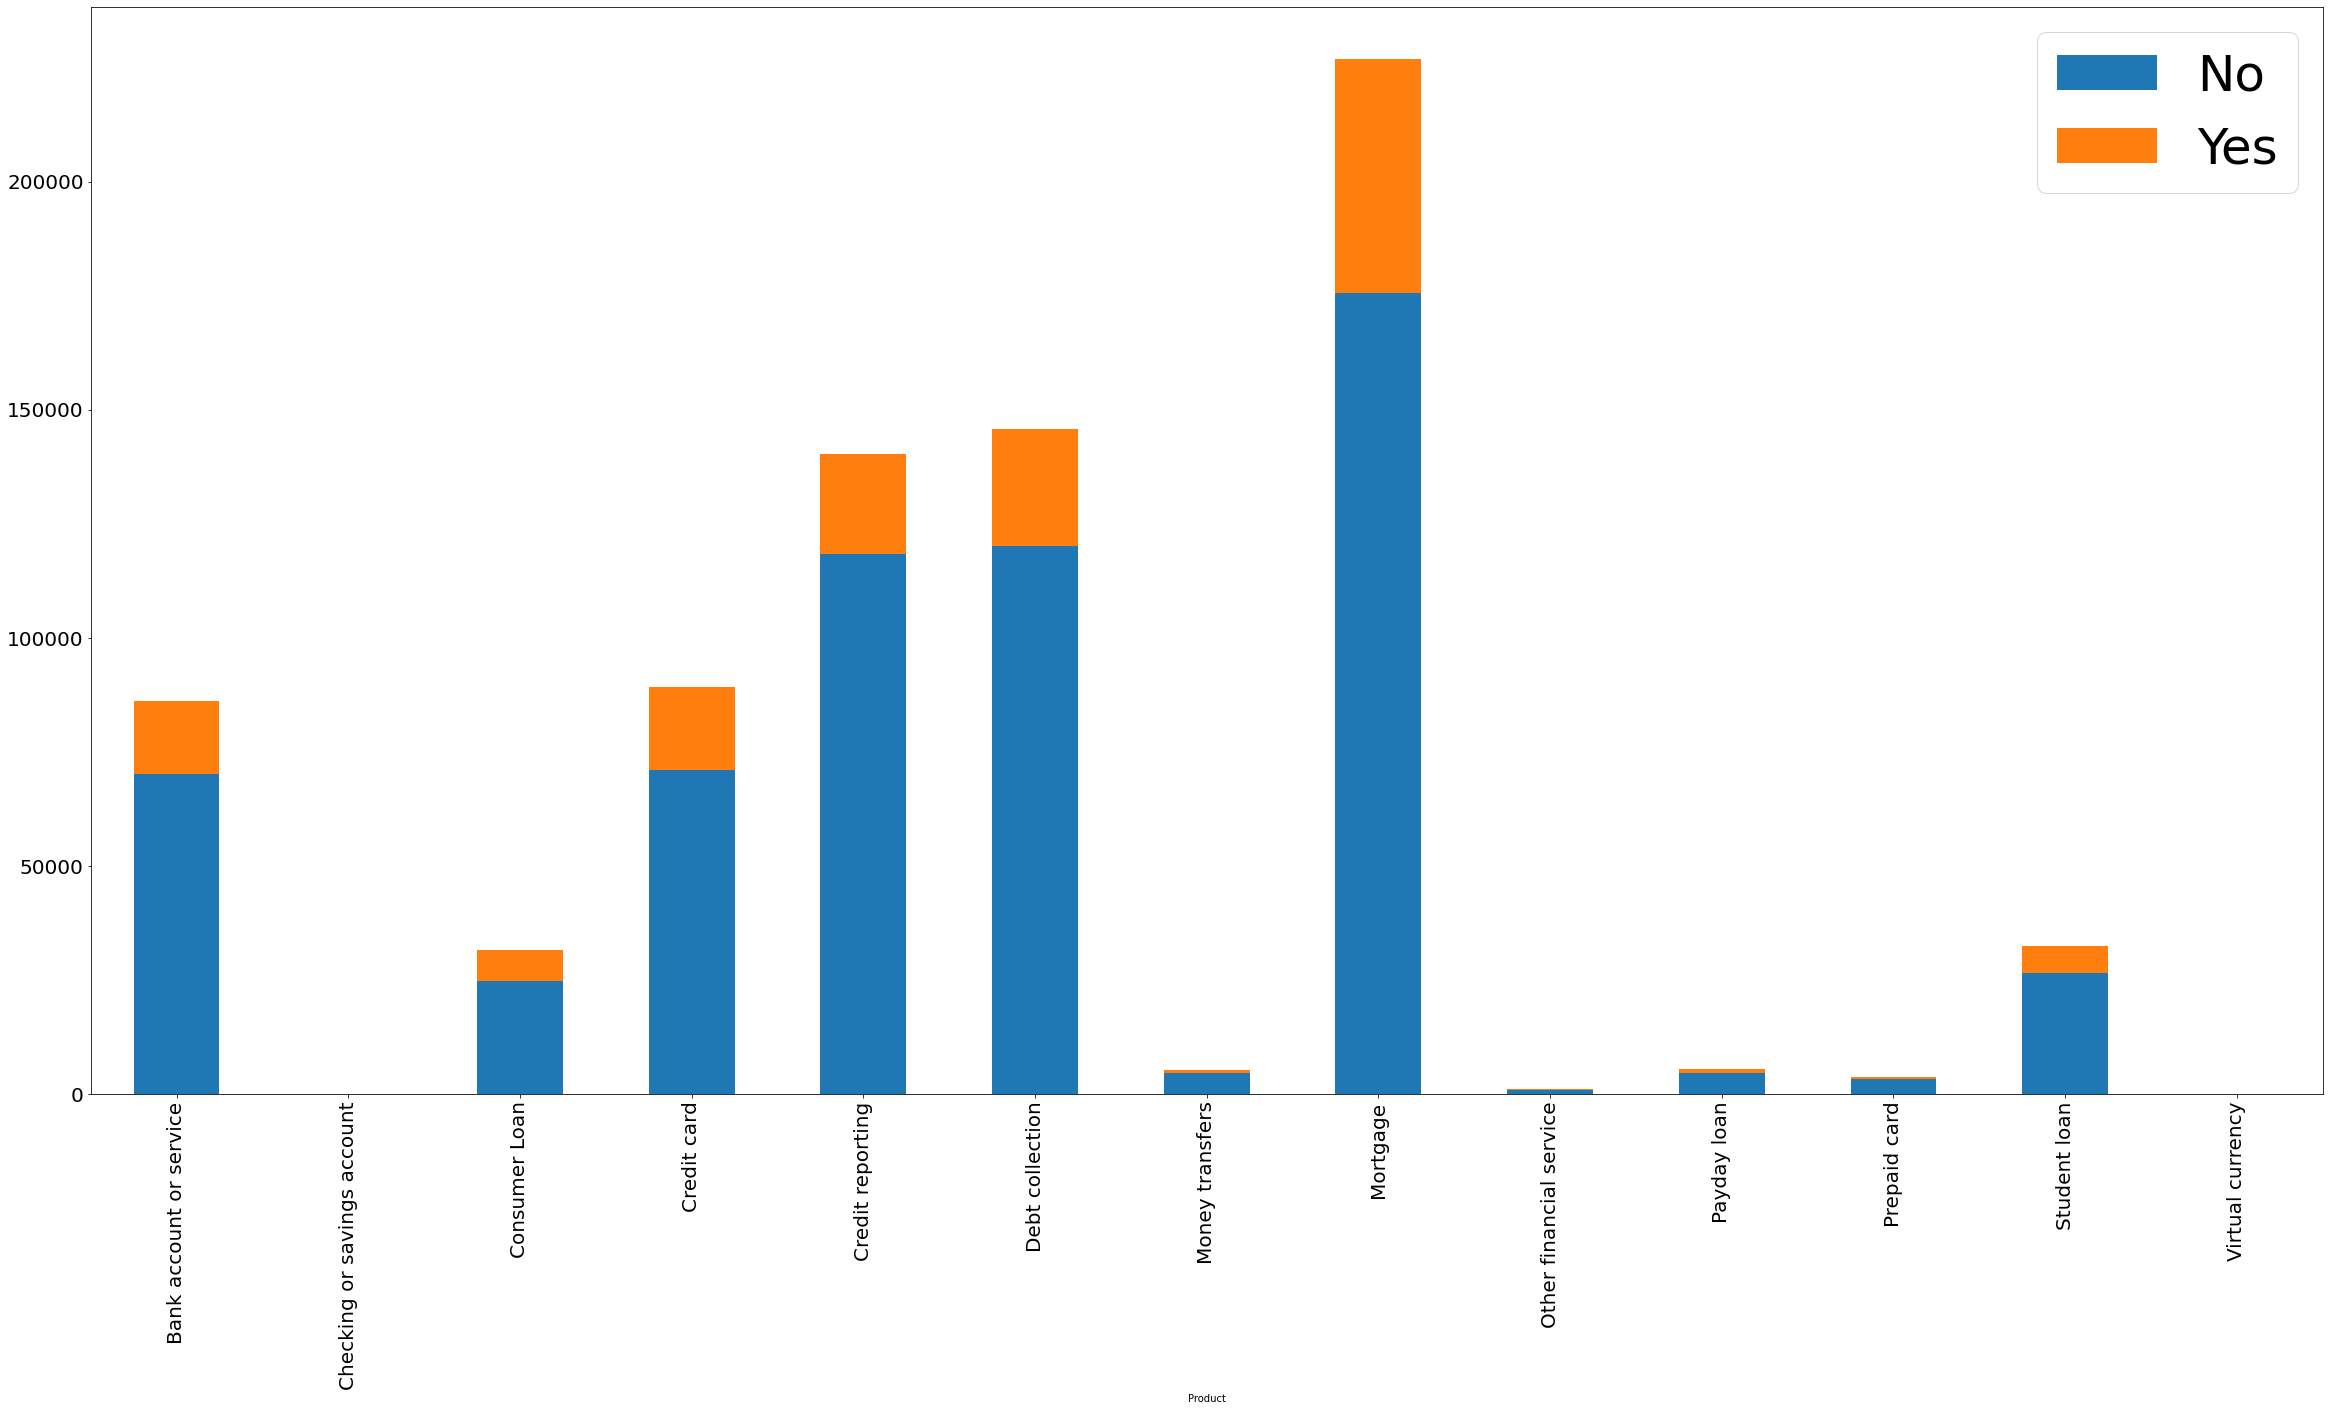
     This plots show that mortage service providers have the most consumers but it tells us almost nothing about "Why" the consumer stopped using such services. Now you might be quick to say we should discard it but here is a plot of it against Issues
      Products vs Isssues
     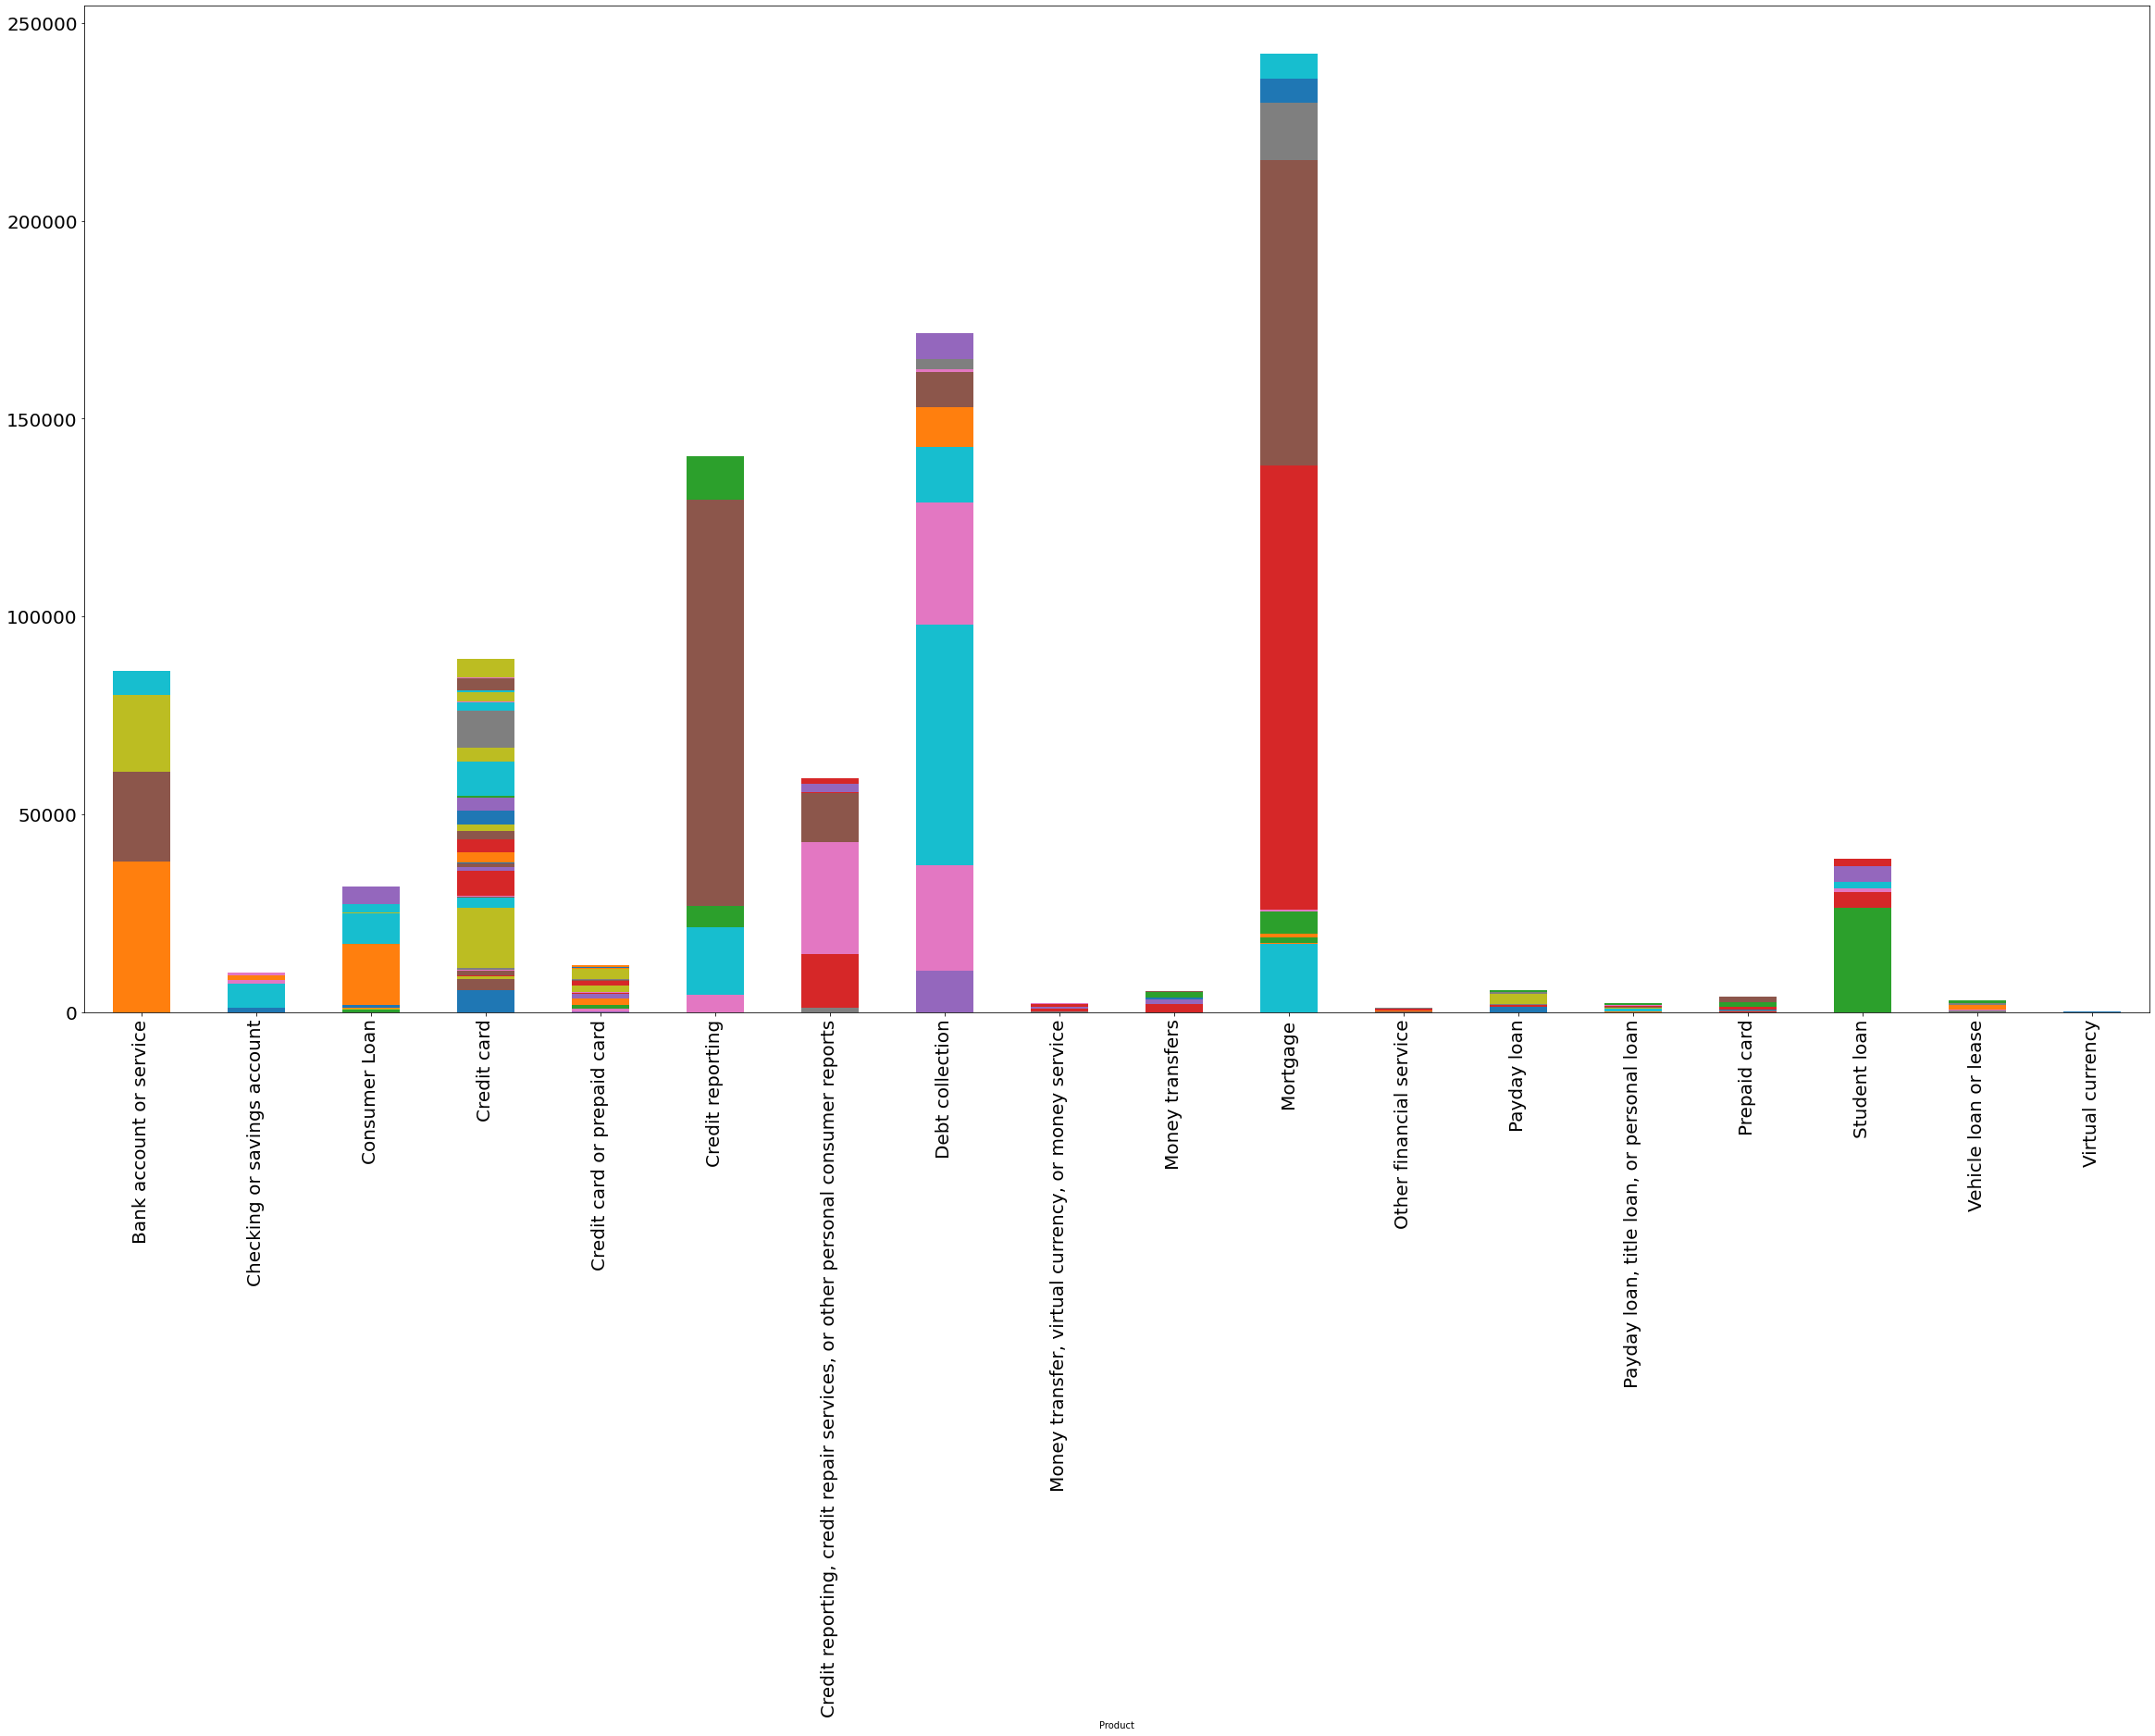
     
     Isn't this plot more colorful? meanwhile cause the distribution of the dataset doesn't allow us to properly label the product axis according to their colors, but its quite obvious that a large number of people using the mortgage services have a problem with whatever the red part of the histogram means!!!
     
     here is the description of the products
| description| value                                       |
|------------|---------------------------------------------|      
| count      |                                      903983 |
| unique     |                                            8|
| top        |                      Closed with explanation|
| freq       |                                     686039  |
| Name:      |Product, dtype: object                         |
|---------------------------------------------------------|
     
     
      

##### 6.) Others:
###### Sub-product

| description| value                                       |
|------------|---------------------------------------------|      
| count      |                                      668823 |
| unique     |                                           18|
| top        |                                     Mortgage|
| freq       |                                     242194  |
| Name:      |Sub-product, dtype: object                         |
|----------------------------------------------------------|


In [10]:
#Preprocess selected data via one hot encoding

import numpy as np
chuck_size = 10
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return res

In [11]:
features_to_encode = ['Product', 'Issue', 'Company response to consumer',
                      'Timely response?']
for feature in features_to_encode:
    df2 = encode_and_bind(df2, feature)
    del df2[feature]

In [12]:
df2.head()

,Consumer disputed?,Product_Bank account or service,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit card or prepaid card,Product_Credit reporting,"Product_Credit reporting, credit repair services, or other personal consumer reports",Product_Debt collection,"Product_Money transfer, virtual currency, or money service",...,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_In progress,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes
0,No,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,No,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,No,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,Yes,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,Yes,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [13]:
target = df2['Consumer disputed?']
del df2['Consumer disputed?']
train = df2

In [14]:
df2.head()

,Product_Bank account or service,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit card or prepaid card,Product_Credit reporting,"Product_Credit reporting, credit repair services, or other personal consumer reports",Product_Debt collection,"Product_Money transfer, virtual currency, or money service",Product_Money transfers,...,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_In progress,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


# Prediction Algorithm of likelihood of loss of consumer

    Now that we have choosen what factors affect whether a consumer would be disputed or not, We move on to building a machine learning algorithm that can take as its input these factors and predict whether or not the consumer is likey to continue using such services or discard them. For this task we use a feed forward neural network architecture made of stacked dense layers to learn a relationship between this features and the outcome.

In [15]:
import keras

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3x\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [16]:
import numpy as np

In [17]:
def to_one_hot(labels, dimension=1):
    results = np.zeros((len(labels), dimension), dtype = 'float32')
    for i, label in enumerate(labels):
        if label == "Yes":
            results[i] = 1.
    return results

In [18]:
target = to_one_hot(target)

In [19]:
target[1:5]

array([[0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [20]:
print(len(train))
print(len(target))

903983
903983


In [21]:
x_train = train[:70000]
y_train = target[:70000]

x_test = train[70000:80000]
y_test = target[70000:80000]

In [22]:
print(x_train.shape)

(70000, 194)


In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (194,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = "sigmoid"))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                12480     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 16,705
Trainable params: 16,705
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='rmsprop', 
             loss = "binary_crossentropy", 
             metrics = ["accuracy"])

In [26]:
print(y_train.dtype)

float32


In [27]:
x_train = np.asarray(x_train, dtype = 'float32')
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
history = model.fit(x_train.values, y_train.values, batch_size = 500, epochs = 1)

done
done
Epoch 1/1
70000/70000 [==============================] - 845s 12ms/step - loss: 0.4728 - acc: 0.8186


In [36]:
x_test = train[70000:80000]
y_test = target[70000:80000]
model.evaluate(x_test.values, y_test)

done
done
10000/10000 [==============================] - 63s 6ms/step


[0.4378021306037903, 0.831]

#### After training we were able to achieve an accuracy of 83.1% even though we only trained on less than 10% of our original data!!! This is a huge improvement cause now not only do we not have to manually guess the outcome of a cusumer making complaints of a service being a mortgage and blah, blah, blah, but now we have a model that gives us a certain percent of whether or not the consumer is likely to continie using such services but not it can be done with high accuracy!!!!!!!

In [57]:
#test the model
test = train[80001:80002].values
pred = model.predict(test)
if pred[0][0] < 0.5:
    print("The consumer is likely to stop using this service")
else:
    print("The consumer is satified with this service")

done
The consumer is likely to stop using this service


In [51]:
model.save('consumer_disputed.h5')